# House Price Prediction (Prodigy Internship)

**Introduction**
 *  Hello Everyone this is my first task for Machine Learning  for Prodigy Internship
 *  In this task_01 we are going to apply Liner Regression algorithm  for predict the price from the given data

**CONTENT**

*  Data Reading
* Data Visualization
* EDA
   *  Univariate Analysis
   *  Bivariate Analysis
* Data Cleaning
* Reomve the Outliers
* Remove the Skweness
* Feature Enigineering
* Feature Transformation
    *  Encoding
* Feature Scaling
* Checking and removing multi-collineraity
* Implement the Linear Regression Algorithm
* Evaluating the model


*Installing Scikit Plot*

In [2]:
!pip install scikit-plot

*Importings Libraries*

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
from sklearn.preprocessing import OrdinalEncoder,power_transform,StandardScaler,MinMaxScaler,LabelEncoder
from sklearn.model_selection import train_test_split,cross_val_score,KFold,GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
import scikitplot as skplot

*Data Reading*

In [4]:
data=pd.read_csv("/content/train-4.csv")
data

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0        1          60       RL         65.0     8450   Pave   NaN      Reg   
1        2          20       RL         80.0     9600   Pave   NaN      Reg   
2        3          60       RL         68.0    11250   Pave   NaN      IR1   
3        4          70       RL         60.0     9550   Pave   NaN      IR1   
4        5          60       RL         84.0    14260   Pave   NaN      IR1   
...    ...         ...      ...          ...      ...    ...   ...      ...   
1455  1456          60       RL         62.0     7917   Pave   NaN      Reg   
1456  1457          20       RL         85.0    13175   Pave   NaN      Reg   
1457  1458          70       RL         66.0     9042   Pave   NaN      Reg   
1458  1459          20       RL         68.0     9717   Pave   NaN      Reg   
1459  1460          20       RL         75.0     9937   Pave   NaN      Reg   

     LandContour Utilities  ... PoolArea PoolQC  Fence MiscFeature MiscVal  \
0            Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
1            Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
2            Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
3            Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
4            Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
...          ...       ...  ...      ...    ...    ...         ...     ...   
1455         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
1456         Lvl    AllPub  ...        0    NaN  MnPrv         NaN       0   
1457         Lvl    AllPub  ...        0    NaN  GdPrv        Shed    2500   
1458         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
1459         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   

     MoSold YrSold  SaleType  SaleCondition  SalePrice  
0         2   2008        WD         Normal     208500  
1         5   2007        WD         Normal     181500  
2         9   2008        WD         Normal     223500  
3         2   2006        WD        Abnorml     140000  
4        12   2008        WD         Normal     250000  
...     ...    ...       ...            ...        ...  
1455      8   2007        WD         Normal     175000  
1456      2   2010        WD         Normal     210000  
1457      5   2010        WD         Normal     266500  
1458      4   2010        WD         Normal     142125  
1459      6   2008        WD         Normal     147500  

[1460 rows x 81 columns]

*Total Rows & Columns in my Dataset*

In [5]:
data.shape
print("Total Rows in my DataSet------->",data.shape[0])
print("Total Columns in my DataSet------->",data.shape[1])


Total Rows in my DataSet-------> 1460
Total Columns in my DataSet-------> 81


*Checking Dtypes in my Dataset*

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

*Statistical Details*

In [7]:
data.describe()

Id   MSSubClass  LotFrontage        LotArea  OverallQual  \
count  1460.000000  1460.000000  1201.000000    1460.000000  1460.000000   
mean    730.500000    56.897260    70.049958   10516.828082     6.099315   
std     421.610009    42.300571    24.284752    9981.264932     1.382997   
min       1.000000    20.000000    21.000000    1300.000000     1.000000   
25%     365.750000    20.000000    59.000000    7553.500000     5.000000   
50%     730.500000    50.000000    69.000000    9478.500000     6.000000   
75%    1095.250000    70.000000    80.000000   11601.500000     7.000000   
max    1460.000000   190.000000   313.000000  215245.000000    10.000000   

       OverallCond    YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1  ...  \
count  1460.000000  1460.000000   1460.000000  1452.000000  1460.000000  ...   
mean      5.575342  1971.267808   1984.865753   103.685262   443.639726  ...   
std       1.112799    30.202904     20.645407   181.066207   456.098091  ...   
min       1.000000  1872.000000   1950.000000     0.000000     0.000000  ...   
25%       5.000000  1954.000000   1967.000000     0.000000     0.000000  ...   
50%       5.000000  1973.000000   1994.000000     0.000000   383.500000  ...   
75%       6.000000  2000.000000   2004.000000   166.000000   712.250000  ...   
max       9.000000  2010.000000   2010.000000  1600.000000  5644.000000  ...   

        WoodDeckSF  OpenPorchSF  EnclosedPorch    3SsnPorch  ScreenPorch  \
count  1460.000000  1460.000000    1460.000000  1460.000000  1460.000000   
mean     94.244521    46.660274      21.954110     3.409589    15.060959   
std     125.338794    66.256028      61.119149    29.317331    55.757415   
min       0.000000     0.000000       0.000000     0.000000     0.000000   
25%       0.000000     0.000000       0.000000     0.000000     0.000000   
50%       0.000000    25.000000       0.000000     0.000000     0.000000   
75%     168.000000    68.000000       0.000000     0.000000     0.000000   
max     857.000000   547.000000     552.000000   508.000000   480.000000   

          PoolArea       MiscVal       MoSold       YrSold      SalePrice  
count  1460.000000   1460.000000  1460.000000  1460.000000    1460.000000  
mean      2.758904     43.489041     6.321918  2007.815753  180921.195890  
std      40.177307    496.123024     2.703626     1.328095   79442.502883  
min       0.000000      0.000000     1.000000  2006.000000   34900.000000  
25%       0.000000      0.000000     5.000000  2007.000000  129975.000000  
50%       0.000000      0.000000     6.000000  2008.000000  163000.000000  
75%       0.000000      0.000000     8.000000  2009.000000  214000.000000  
max     738.000000  15500.000000    12.000000  2010.000000  755000.000000  

[8 rows x 38 columns]

*Checking Null Values*

In [8]:
data.isna().sum().sum()

7829

*Droping Unwanted Columns*

In [9]:
data.drop(["Id","Utilities"],inplace=True,axis=1)

*Separating the Data into Categorical & Numerical Sets*

In [10]:
data1=data.select_dtypes(include=object)
data1

MSZoning Street Alley LotShape LandContour LotConfig LandSlope  \
0          RL   Pave   NaN      Reg         Lvl    Inside       Gtl   
1          RL   Pave   NaN      Reg         Lvl       FR2       Gtl   
2          RL   Pave   NaN      IR1         Lvl    Inside       Gtl   
3          RL   Pave   NaN      IR1         Lvl    Corner       Gtl   
4          RL   Pave   NaN      IR1         Lvl       FR2       Gtl   
...       ...    ...   ...      ...         ...       ...       ...   
1455       RL   Pave   NaN      Reg         Lvl    Inside       Gtl   
1456       RL   Pave   NaN      Reg         Lvl    Inside       Gtl   
1457       RL   Pave   NaN      Reg         Lvl    Inside       Gtl   
1458       RL   Pave   NaN      Reg         Lvl    Inside       Gtl   
1459       RL   Pave   NaN      Reg         Lvl    Inside       Gtl   

     Neighborhood Condition1 Condition2  ... GarageType GarageFinish  \
0         CollgCr       Norm       Norm  ...     Attchd          RFn   
1         Veenker      Feedr       Norm  ...     Attchd          RFn   
2         CollgCr       Norm       Norm  ...     Attchd          RFn   
3         Crawfor       Norm       Norm  ...     Detchd          Unf   
4         NoRidge       Norm       Norm  ...     Attchd          RFn   
...           ...        ...        ...  ...        ...          ...   
1455      Gilbert       Norm       Norm  ...     Attchd          RFn   
1456       NWAmes       Norm       Norm  ...     Attchd          Unf   
1457      Crawfor       Norm       Norm  ...     Attchd          RFn   
1458        NAmes       Norm       Norm  ...     Attchd          Unf   
1459      Edwards       Norm       Norm  ...     Attchd          Fin   

     GarageQual GarageCond PavedDrive PoolQC  Fence MiscFeature SaleType  \
0            TA         TA          Y    NaN    NaN         NaN       WD   
1            TA         TA          Y    NaN    NaN         NaN       WD   
2            TA         TA          Y    NaN    NaN         NaN       WD   
3            TA         TA          Y    NaN    NaN         NaN       WD   
4            TA         TA          Y    NaN    NaN         NaN       WD   
...         ...        ...        ...    ...    ...         ...      ...   
1455         TA         TA          Y    NaN    NaN         NaN       WD   
1456         TA         TA          Y    NaN  MnPrv         NaN       WD   
1457         TA         TA          Y    NaN  GdPrv        Shed       WD   
1458         TA         TA          Y    NaN    NaN         NaN       WD   
1459         TA         TA          Y    NaN    NaN         NaN       WD   

     SaleCondition  
0           Normal  
1           Normal  
2           Normal  
3          Abnorml  
4           Normal  
...            ...  
1455        Normal  
1456        Normal  
1457        Normal  
1458        Normal  
1459        Normal  

[1460 rows x 42 columns]

In [11]:
col= data1.columns
print(col)
len(col)

Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd',
       'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional',
       'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond',
       'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature', 'SaleType',
       'SaleCondition'],
      dtype='object')


42

**Univariate Analysis**

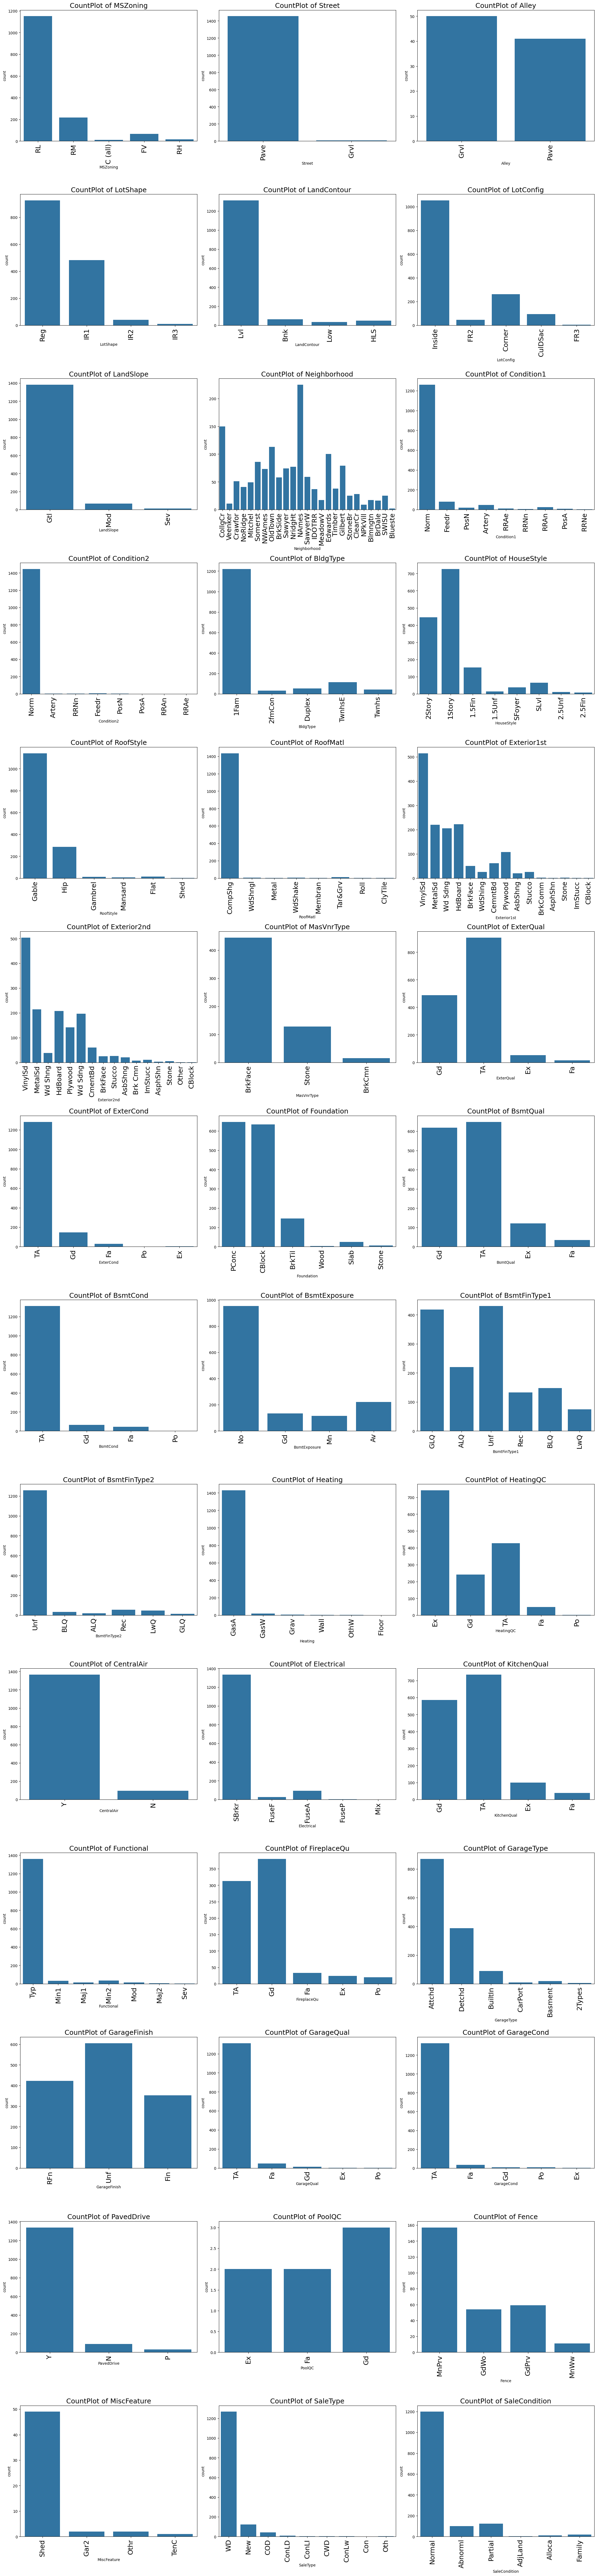

In [12]:
plt.figure(figsize=(22,100))
for i in range(len(col)):
  plt.subplot(15,3,i+1)
  sns.countplot(x=data1[col[i]])
  plt.title(f"CountPlot of {col[i]}",fontsize=18)
  plt.xticks(rotation=90,fontsize=18)
  plt.tight_layout()

***Observation***
*  From MSZoning i can say that most of the people like house that have zone Residential Low Density,Low density says people like to live in more space like villa's
*  From Street i can say that most of the people like to have home that are praved
*  From top of alley access to property i can say that most of the people like to have home at GRVL
*  From LotShape i can say mostly people like reg and very less people who like to live in IR2,IR3
* From LandContour Flatness of the property i can say that mostly people like to live near flat/Level
* From LotConfiguration i can say that mostly people like inside lot and some people like 20% of corner plot
* From LandSlope: Slope of property i can say mostly 90% of people like Gentle slope
*From Neighborhood: Physical locations within Ames city limitsi can say mostly people like to have have at North Ames after this people also like College Creek
*From Condition1: Proximity to various conditions i can say mostly people like Normal and same with condition 2
*From BldgType: Type of dwelling i can say mostly people like Single-family Detached
*From HouseStyle: Style of dwelling i can say moslty people like onestory and twostory more
*From RoofStyle: Type of roof i can say mostly people like Gable style
*From RoofMatl: Roof material i can say mostly people like clay or tile on roof
*From Exterior1st and Exterior2nd i can say moslty people like Vinyl Siding and people also like Metal Siding and hard bord
*From MasVnrType: Masonry veneer type i can say people like None
*Form exterqual and extercond i can say mostly people are happy with Average quality
*From Foundation: Type of foundation i can say moslty people like Cinder Block and Poured Contrete
*From bsmntqual and bsmtcond i can say people like Good (90-99 inches) and typical also
*From BsmtExposure: Refers to walkout or garden level walls people like No Exposure
*From BsmtFinType1: Rating of basement finished area i can say moslty people like Good Living Quarters and unfinished
*From BsmtFinType2 i can say people like good living quarters
*From CenteralAir i can say moslty people like to lave centeralair
*From Electrical: Electrical system i can say people like SBrkr	Standard Circuit Breakers & Romex
*From Countplot of Garage type i can say people love to have a home that have garage Attached to home
*From Salestype i cna say people love to have a home that have Warranty Deed - Conventional
*From salesconditon i can say people love to have a home that have normal condition  

In [13]:
data2= data.select_dtypes(exclude=object)
data2

MSSubClass  LotFrontage  LotArea  OverallQual  OverallCond  YearBuilt  \
0             60         65.0     8450            7            5       2003   
1             20         80.0     9600            6            8       1976   
2             60         68.0    11250            7            5       2001   
3             70         60.0     9550            7            5       1915   
4             60         84.0    14260            8            5       2000   
...          ...          ...      ...          ...          ...        ...   
1455          60         62.0     7917            6            5       1999   
1456          20         85.0    13175            6            6       1978   
1457          70         66.0     9042            7            9       1941   
1458          20         68.0     9717            5            6       1950   
1459          20         75.0     9937            5            6       1965   

      YearRemodAdd  MasVnrArea  BsmtFinSF1  BsmtFinSF2  ...  WoodDeckSF  \
0             2003       196.0         706           0  ...           0   
1             1976         0.0         978           0  ...         298   
2             2002       162.0         486           0  ...           0   
3             1970         0.0         216           0  ...           0   
4             2000       350.0         655           0  ...         192   
...            ...         ...         ...         ...  ...         ...   
1455          2000         0.0           0           0  ...           0   
1456          1988       119.0         790         163  ...         349   
1457          2006         0.0         275           0  ...           0   
1458          1996         0.0          49        1029  ...         366   
1459          1965         0.0         830         290  ...         736   

      OpenPorchSF  EnclosedPorch  3SsnPorch  ScreenPorch  PoolArea  MiscVal  \
0              61              0          0            0         0        0   
1               0              0          0            0         0        0   
2              42              0          0            0         0        0   
3              35            272          0            0         0        0   
4              84              0          0            0         0        0   
...           ...            ...        ...          ...       ...      ...   
1455           40              0          0            0         0        0   
1456            0              0          0            0         0        0   
1457           60              0          0            0         0     2500   
1458            0            112          0            0         0        0   
1459           68              0          0            0         0        0   

      MoSold  YrSold  SalePrice  
0          2    2008     208500  
1          5    2007     181500  
2          9    2008     223500  
3          2    2006     140000  
4         12    2008     250000  
...      ...     ...        ...  
1455       8    2007     175000  
1456       2    2010     210000  
1457       5    2010     266500  
1458       4    2010     142125  
1459       6    2008     147500  

[1460 rows x 37 columns]

In [14]:
col1=data2.columns

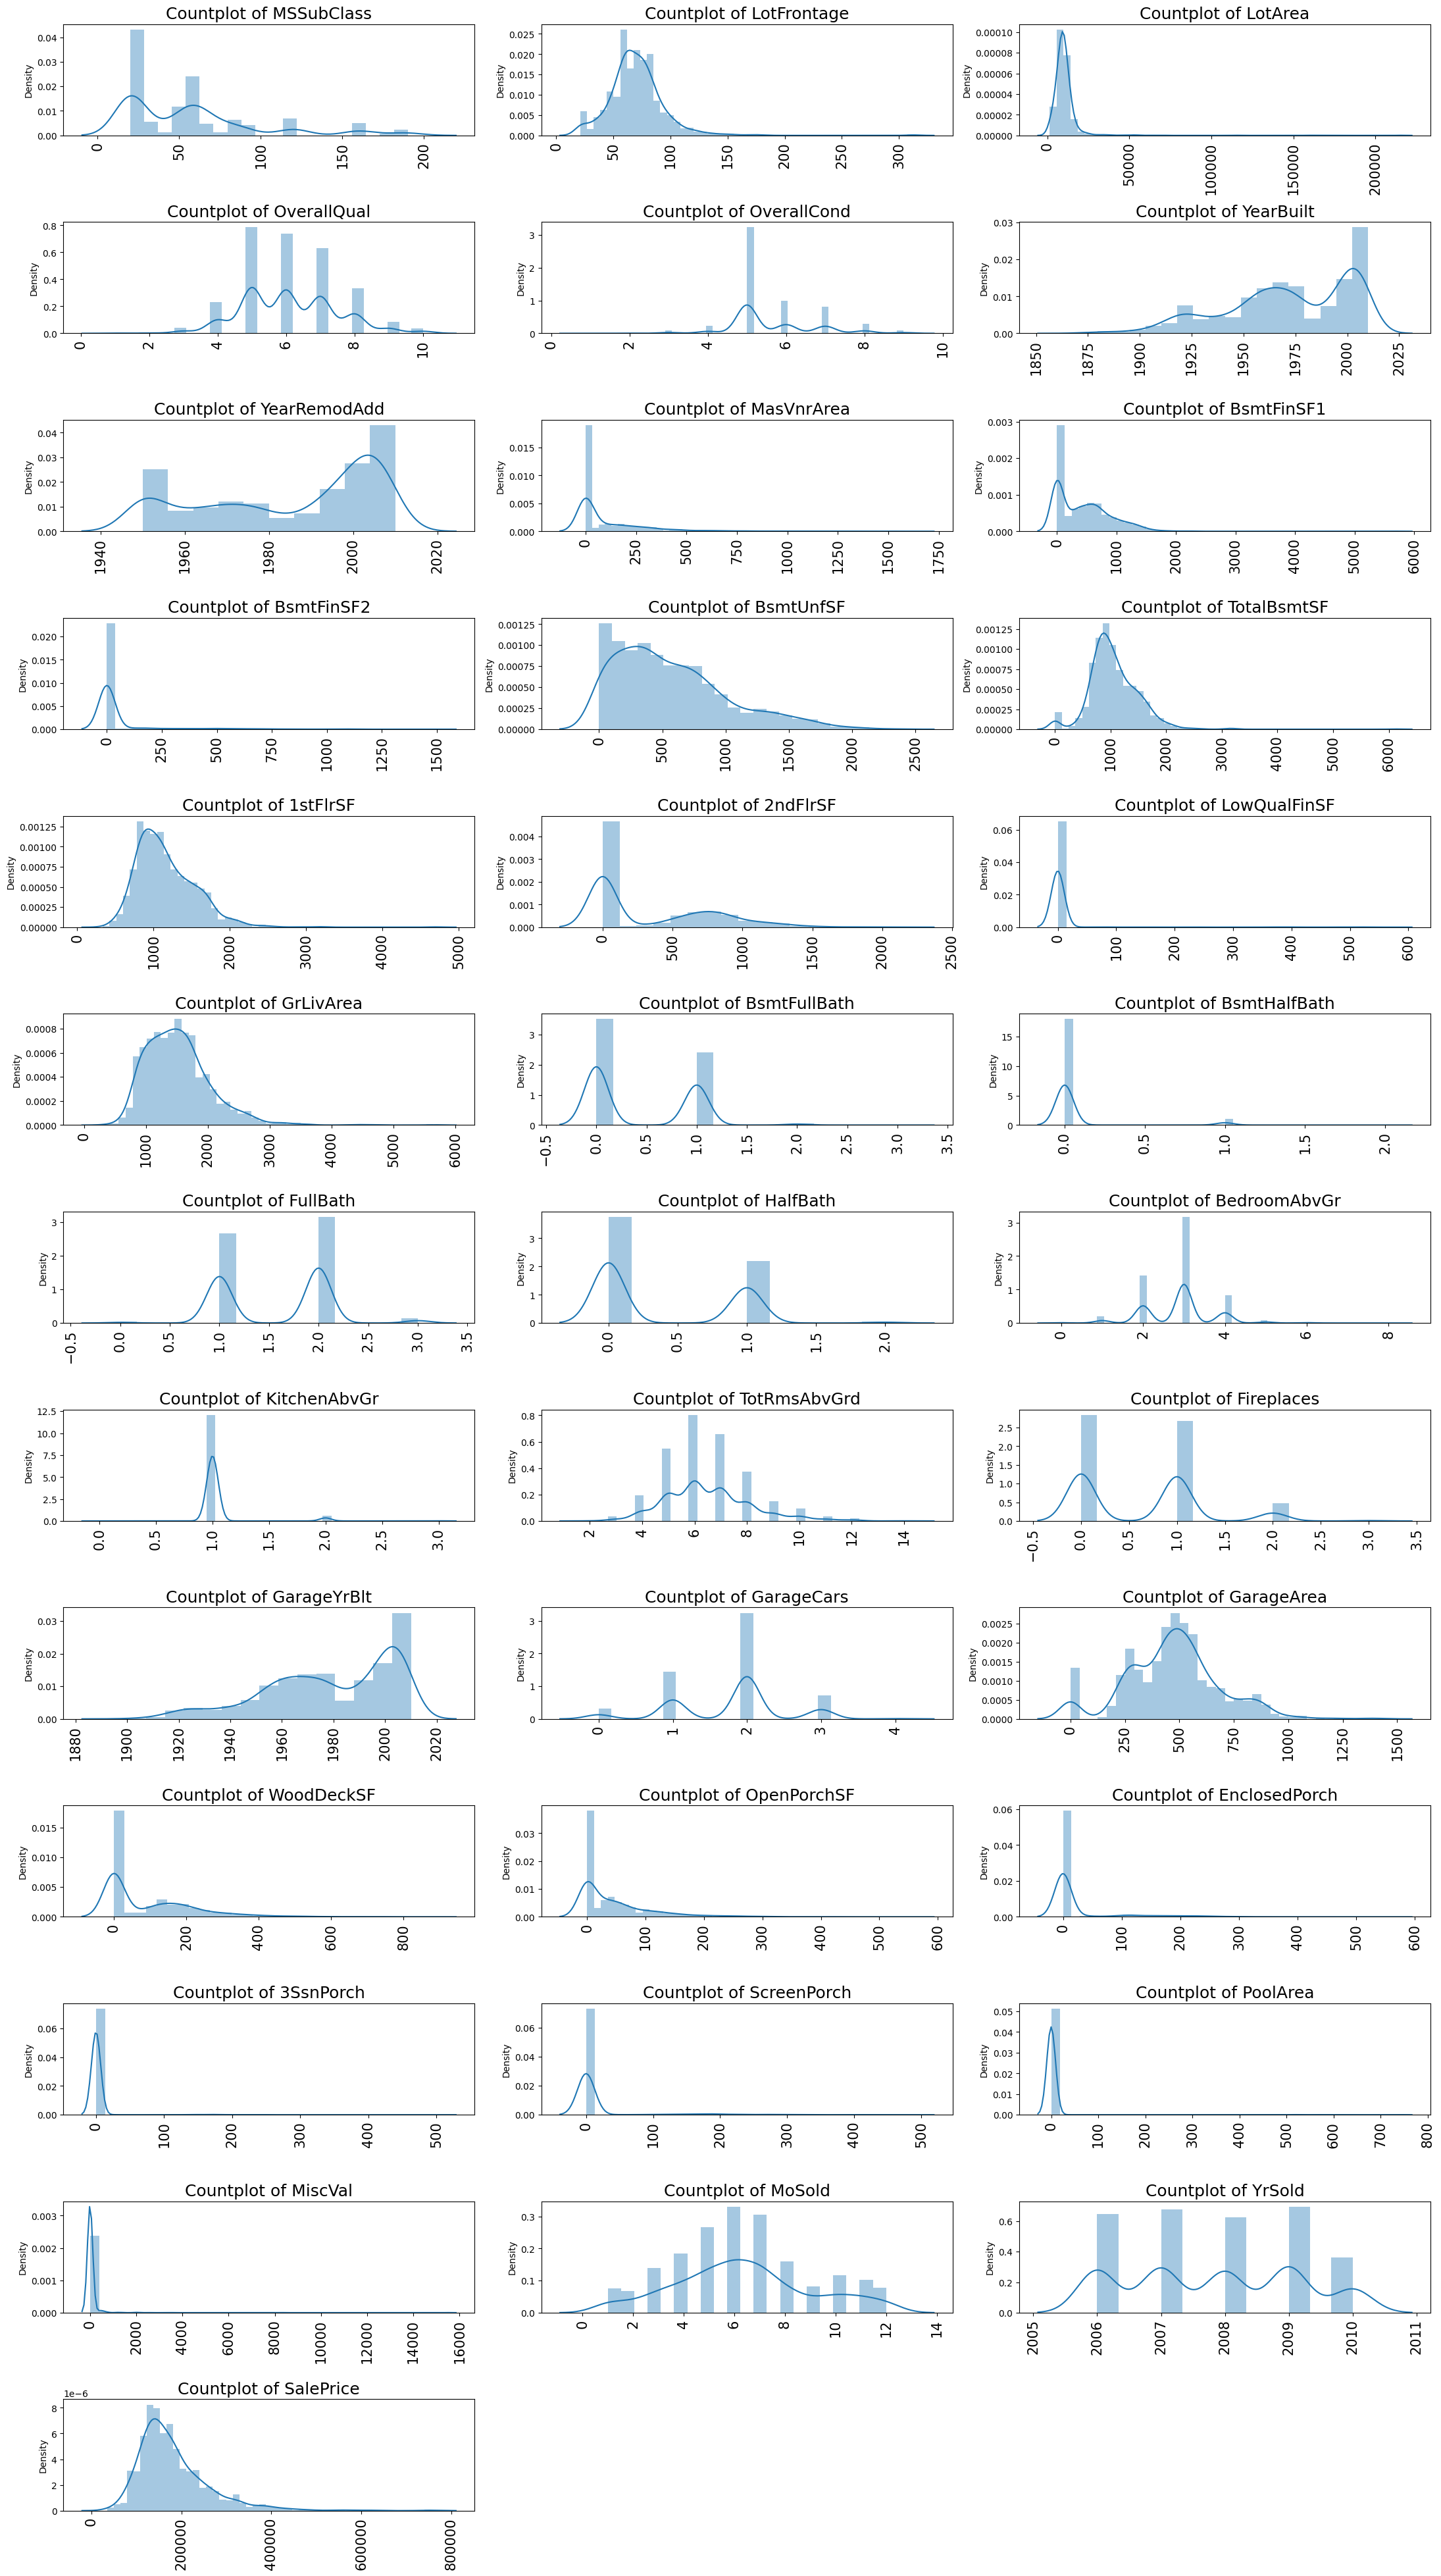

In [15]:
plt.figure(figsize=(22,300))
for i in range(len(col1)):
  plt.subplot(100,3,i+1)
  sns.distplot(x=data2[col1[i]])
  plt.title(f"Countplot of {col1[i]}",fontsize=18)
  plt.xticks(rotation=90,fontsize=15)
  plt.tight_layout()

**Bivariate Analysis**

*Importig Libraries*

In [16]:
from numpy import mean
import matplotlib.gridspec as gridspec
from matplotlib.gridspec import GridSpec

Text(0, 0.5, 'Average_SalesPrice')

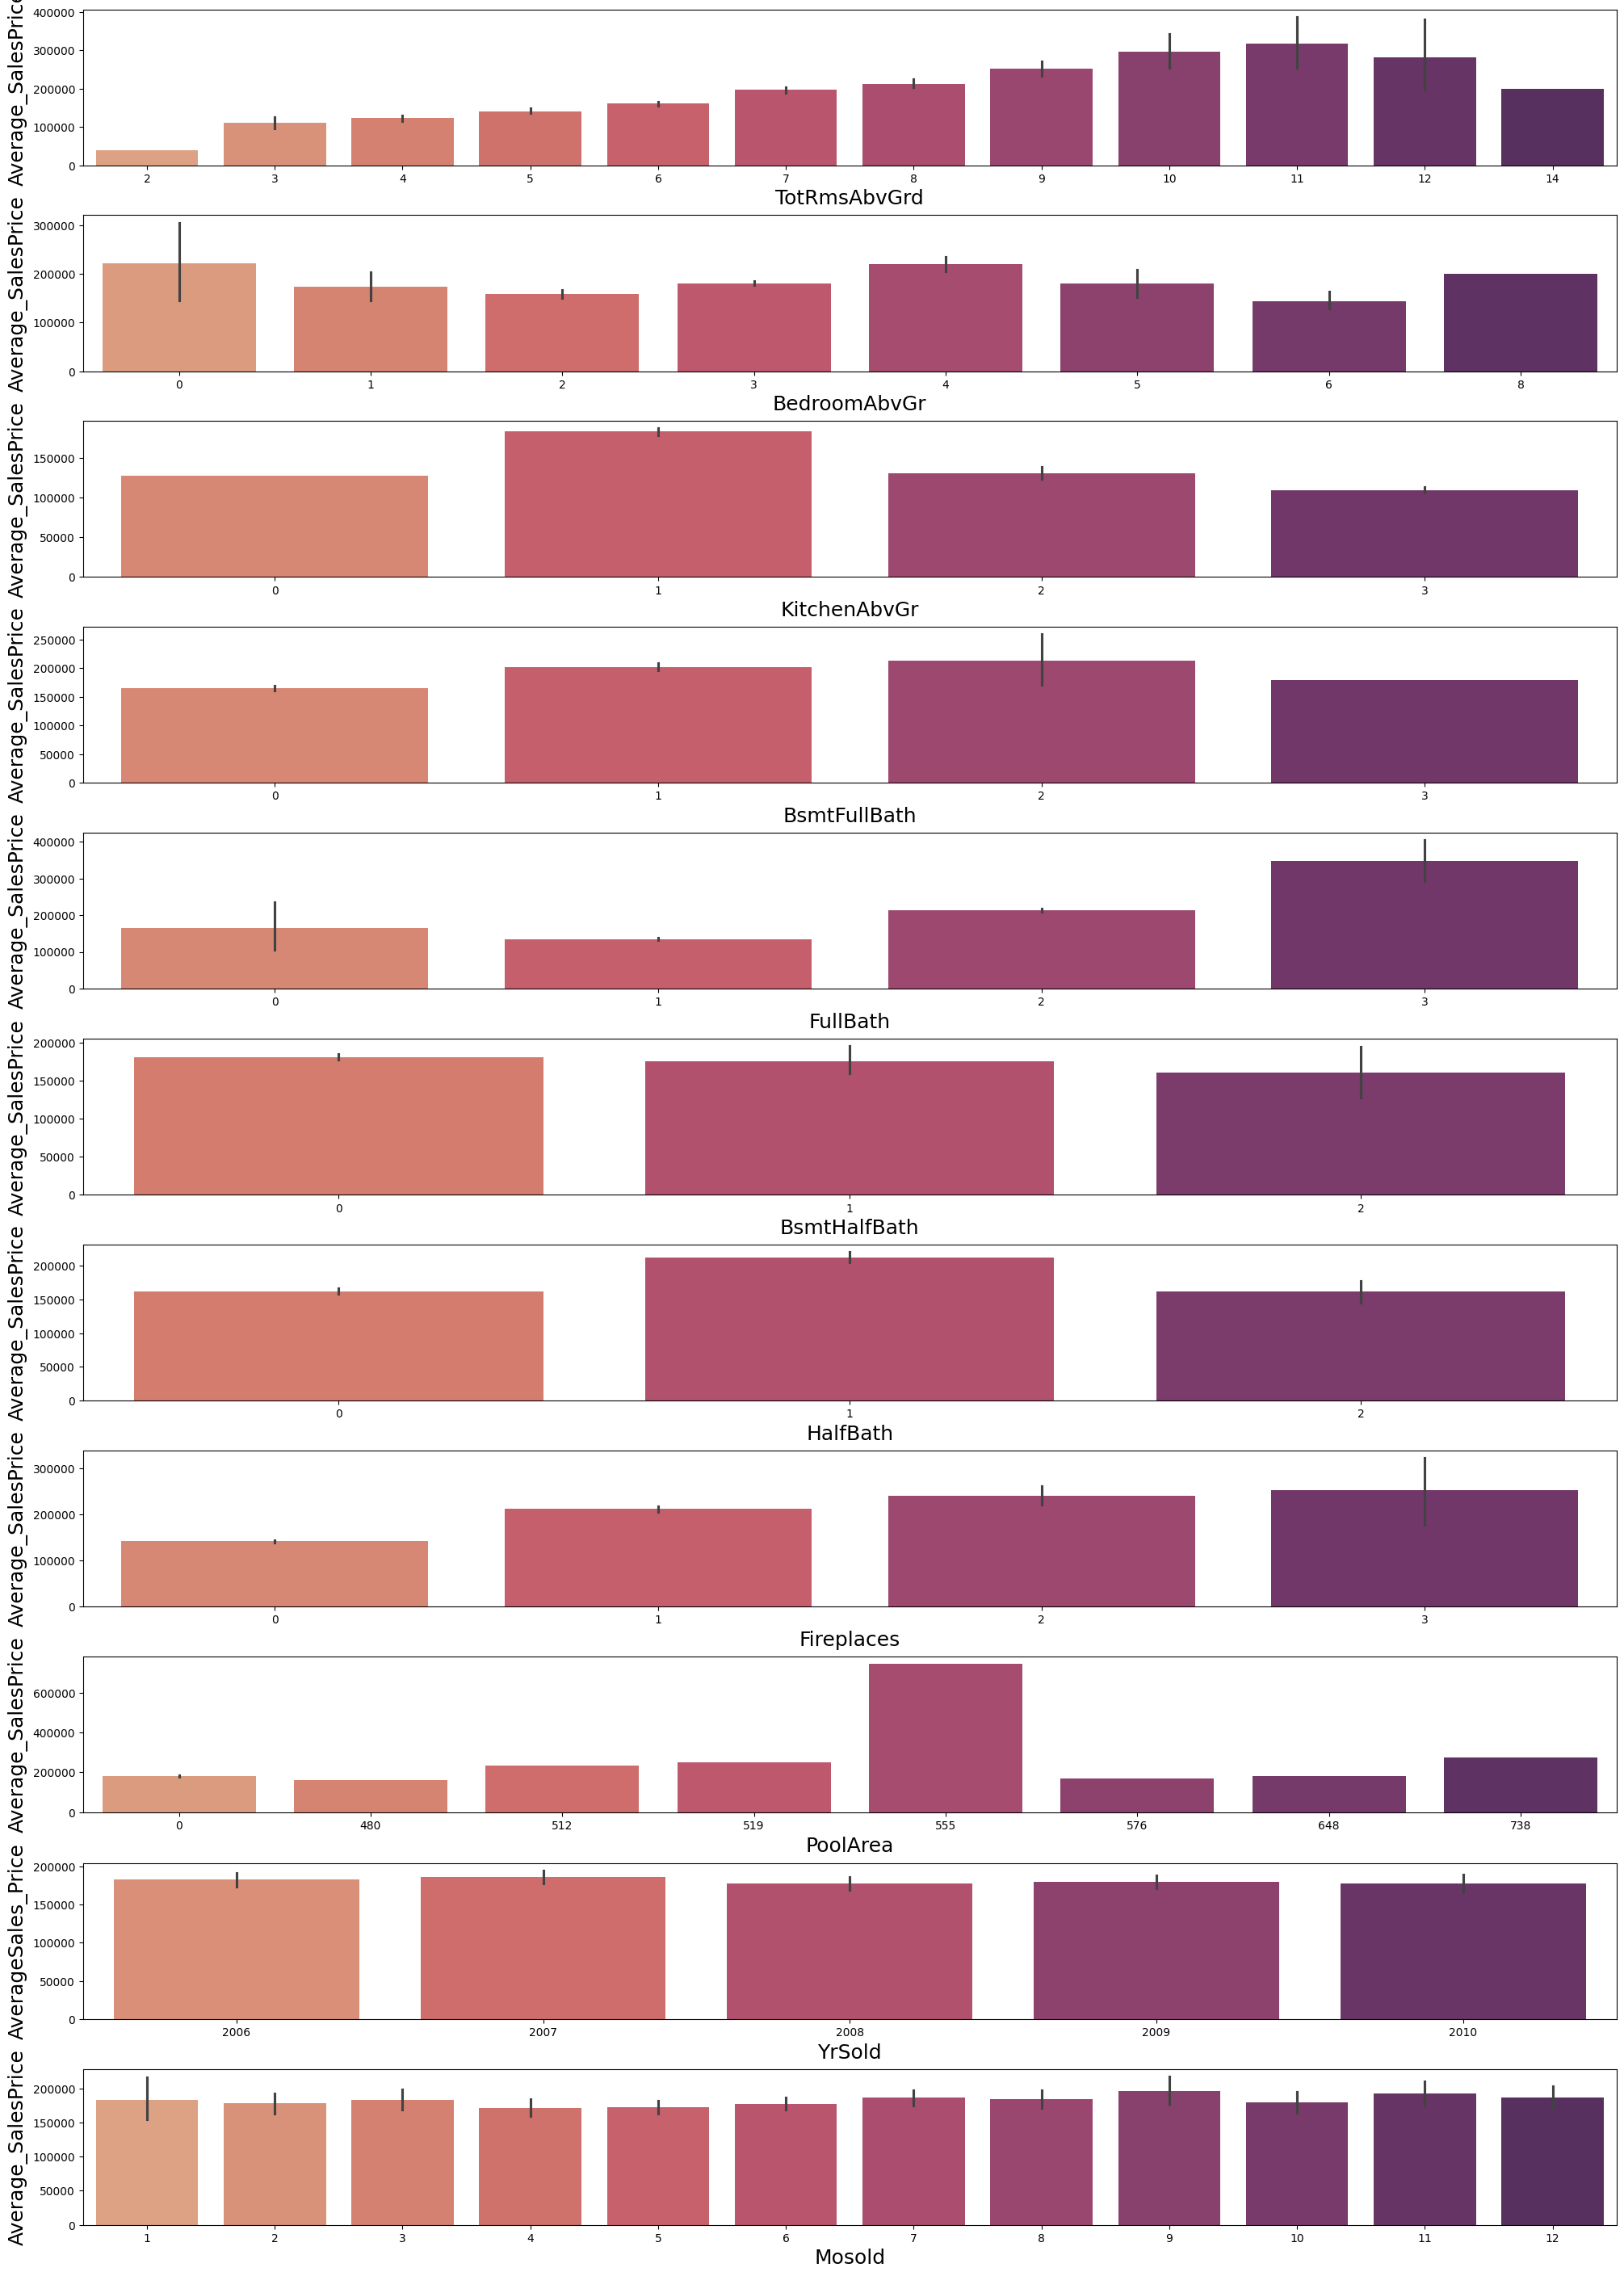

In [17]:
fig=plt.figure(constrained_layout=True,figsize=(20,30))
gs = GridSpec(12,3,figure=fig)

plt.subplot(gs[0,:])
ax1=sns.barplot(data=data,x="TotRmsAbvGrd",y="SalePrice",estimator = mean, palette ="flare")
plt.xlabel("TotRmsAbvGrd",fontsize=18)
plt.ylabel("Average_SalesPrice",fontsize=18)

plt.subplot(gs[1,:])
ax2=sns.barplot(data=data,x="BedroomAbvGr",y="SalePrice",estimator=mean,palette="flare")
plt.xlabel("BedroomAbvGr",fontsize=18)
plt.ylabel("Average_SalesPrice",fontsize=18)

plt.subplot(gs[2,:])
ax3= sns.barplot(data=data,x="KitchenAbvGr",y="SalePrice",estimator=mean,palette="flare")
plt.xlabel("KitchenAbvGr",fontsize=18)
plt.ylabel("Average_SalesPrice",fontsize=18)

plt.subplot(gs[3,:])
ax4 =sns.barplot(data=data,x="BsmtFullBath",y="SalePrice",estimator=mean,palette="flare")
plt.xlabel("BsmtFullBath",fontsize=18)
plt.ylabel("Average_SalesPrice",fontsize=18)

plt.subplot(gs[4,:])
ax5 =sns.barplot(data=data,x="FullBath",y="SalePrice",estimator=mean,palette="flare")
plt.xlabel("FullBath",fontsize=18)
plt.ylabel("Average_SalesPrice",fontsize=18)

plt.subplot(gs[5,:])
ax6 =sns.barplot(data=data,x="BsmtHalfBath",y="SalePrice",estimator=mean,palette="flare")
plt.xlabel("BsmtHalfBath",fontsize=18)
plt.ylabel("Average_SalesPrice",fontsize=18)

plt.subplot(gs[6,:])
ax7 =sns.barplot(data=data,x="HalfBath",y="SalePrice",estimator=mean,palette="flare")
plt.xlabel("HalfBath",fontsize=18)
plt.ylabel("Average_SalesPrice",fontsize=18)

plt.subplot(gs[7,:])
ax8 =sns.barplot(data=data,x="Fireplaces",y="SalePrice",estimator=mean,palette="flare")
plt.xlabel("Fireplaces",fontsize=18)
plt.ylabel("Average_SalesPrice",fontsize=18)

plt.subplot(gs[8,:])
ax9 =sns.barplot(data=data,x="PoolArea",y="SalePrice",estimator=mean,palette="flare")
plt.xlabel("PoolArea",fontsize=18)
plt.ylabel("Average_SalesPrice",fontsize=18)

plt.subplot(gs[9,:])
ax10 =sns.barplot(data=data,x="YrSold",y="SalePrice",estimator=mean,palette="flare")
plt.xlabel("YrSold",fontsize=18)
plt.ylabel("AverageSales_Price",fontsize=18)

plt.subplot(gs[10,:])
ax11 =sns.barplot(data=data,x="MoSold",y="SalePrice",estimator=mean,palette="flare")
plt.xlabel("Mosold",fontsize=18)
plt.ylabel("Average_SalesPrice",fontsize=18)

**Observation**

* Total Rooms Above Ground-As the room no. increasing the average price is also increasing till 11th room after that price start decreasing
* Bedroom ABove Ground-For the 0,4,8 Bedroom price is high and price is very less for 6 and 2
* Kitchen Above Ground-as the no of kitchen is increasing the price is reducing and mostly people take one kitchen only
* In Basement full bathrrom and half bathrooms as the bathroom size increasing the price is also increasing
* Fireplaces-As the fireplaces increasing the sale price is also increasing
* PoolArea-as big the pool the more costly the house
* YRsold-the price was high in 2006 as comapre to old year prices descresed in 2008-10
* MOSold-most of the people who sold there home in 09 month they got high price and people who sold there home on 4th month got less price

**Checking Skewness**

* -1 and -0.5, the data is negatively skewed, and if it is between 0.5 to 1, the data is positively skewed
* Right skew (also called positive skew). A right-skewed distribution is longer on the right side of its peak than on its left.
* Left skew (also called negative skew). A left-skewed distribution is longer on the left side of its peak than on its right.
* Zero skew.

In [18]:
data2.skew()

MSSubClass        1.407657
LotFrontage       2.163569
LotArea          12.207688
OverallQual       0.216944
OverallCond       0.693067
YearBuilt        -0.613461
YearRemodAdd     -0.503562
MasVnrArea        2.669084
BsmtFinSF1        1.685503
BsmtFinSF2        4.255261
BsmtUnfSF         0.920268
TotalBsmtSF       1.524255
1stFlrSF          1.376757
2ndFlrSF          0.813030
LowQualFinSF      9.011341
GrLivArea         1.366560
BsmtFullBath      0.596067
BsmtHalfBath      4.103403
FullBath          0.036562
HalfBath          0.675897
BedroomAbvGr      0.211790
KitchenAbvGr      4.488397
TotRmsAbvGrd      0.676341
Fireplaces        0.649565
GarageYrBlt      -0.649415
GarageCars       -0.342549
GarageArea        0.179981
WoodDeckSF        1.541376
OpenPorchSF       2.364342
EnclosedPorch     3.089872
3SsnPorch        10.304342
ScreenPorch       4.122214
PoolArea         14.828374
MiscVal          24.476794
MoSold            0.212053
YrSold            0.096269
SalePrice         1.882876
d

**Some important points for skewness**

* Logarithmic Transformation: Apply a logarithmic function to the data. This transformation is useful when the data is positively skewed.

import numpy as np
      
transformed_data = np.log(original_data)

* Square Root Transformation: Take the square root of the data values. This transformation is suitable for reducing right skewness.


import numpy as np

transformed_data = np.sqrt(original_data)

* Box-Cox Transformation: The Box-Cox transformation is a versatile technique that can handle a range of skewness. It includes a parameter lambda (λ) that determines the type of transformation applied. This transformation requires the data to be positive.

from scipy.stats import boxcox
  
transformed_data, lambda_value = boxcox(original_data)

**Outliers**

In [19]:
x_col = data2.columns.values
len(x_col)

37

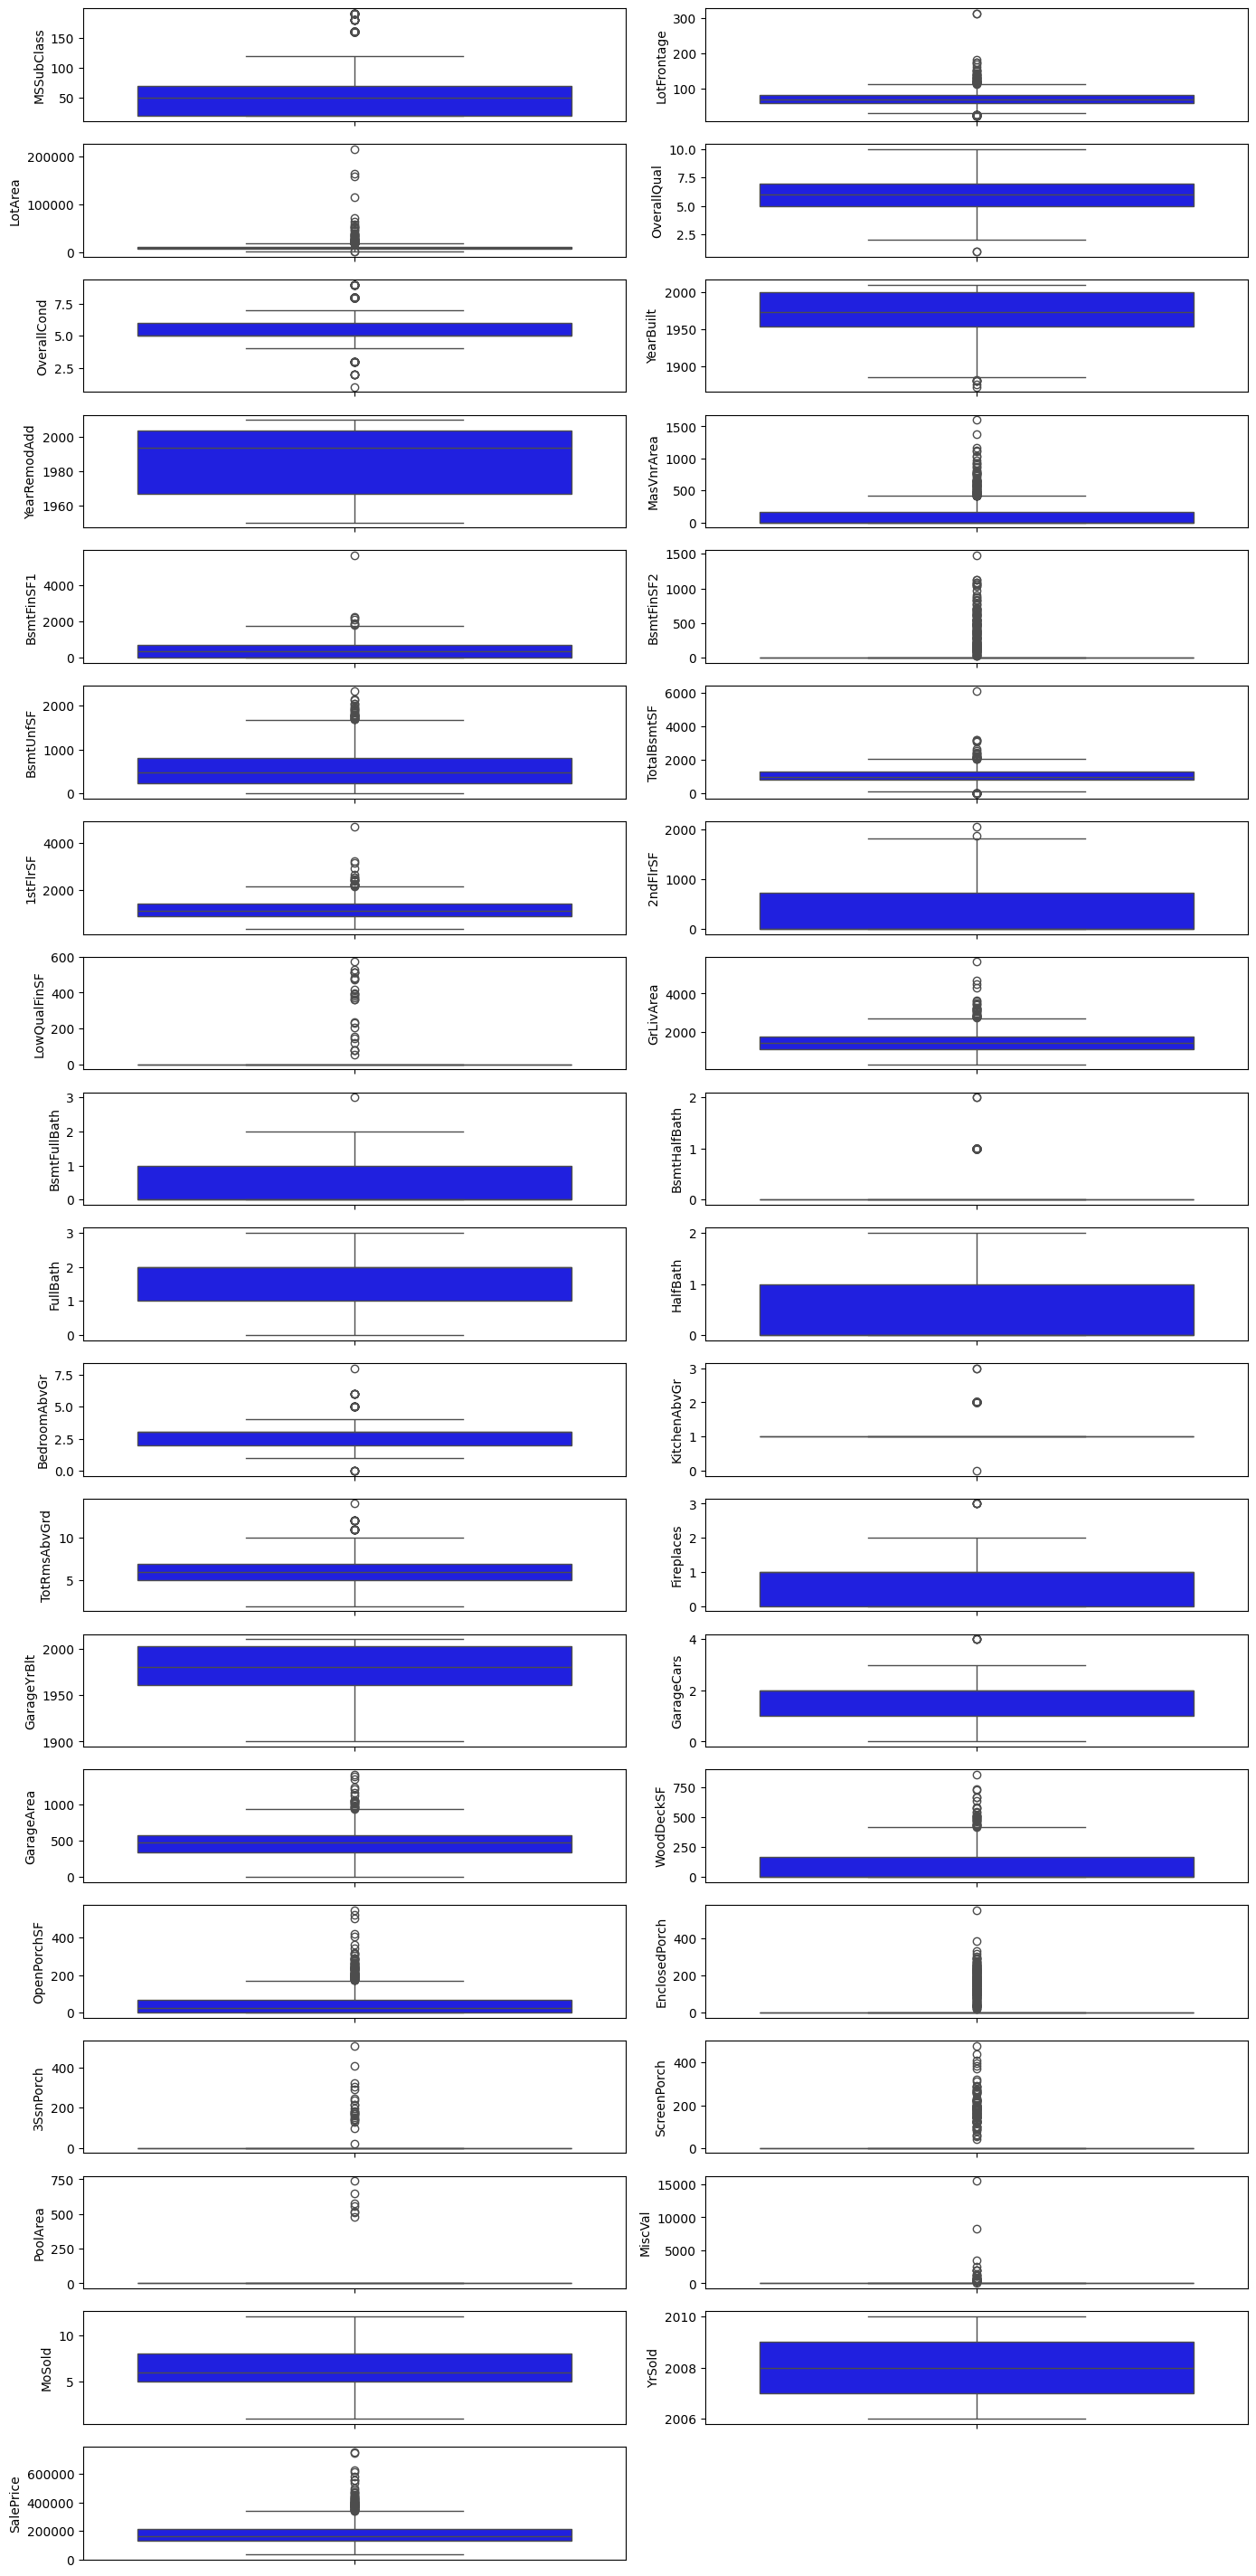

In [20]:
plt.figure(figsize=(14,30))
for i in range(0,len(x_col)):
  plt.subplot(20,2,i+1)
  sns.boxplot(data2[x_col[i]],color="blue")
  plt.tight_layout()

**Co-relation between the data**

<Axes: >

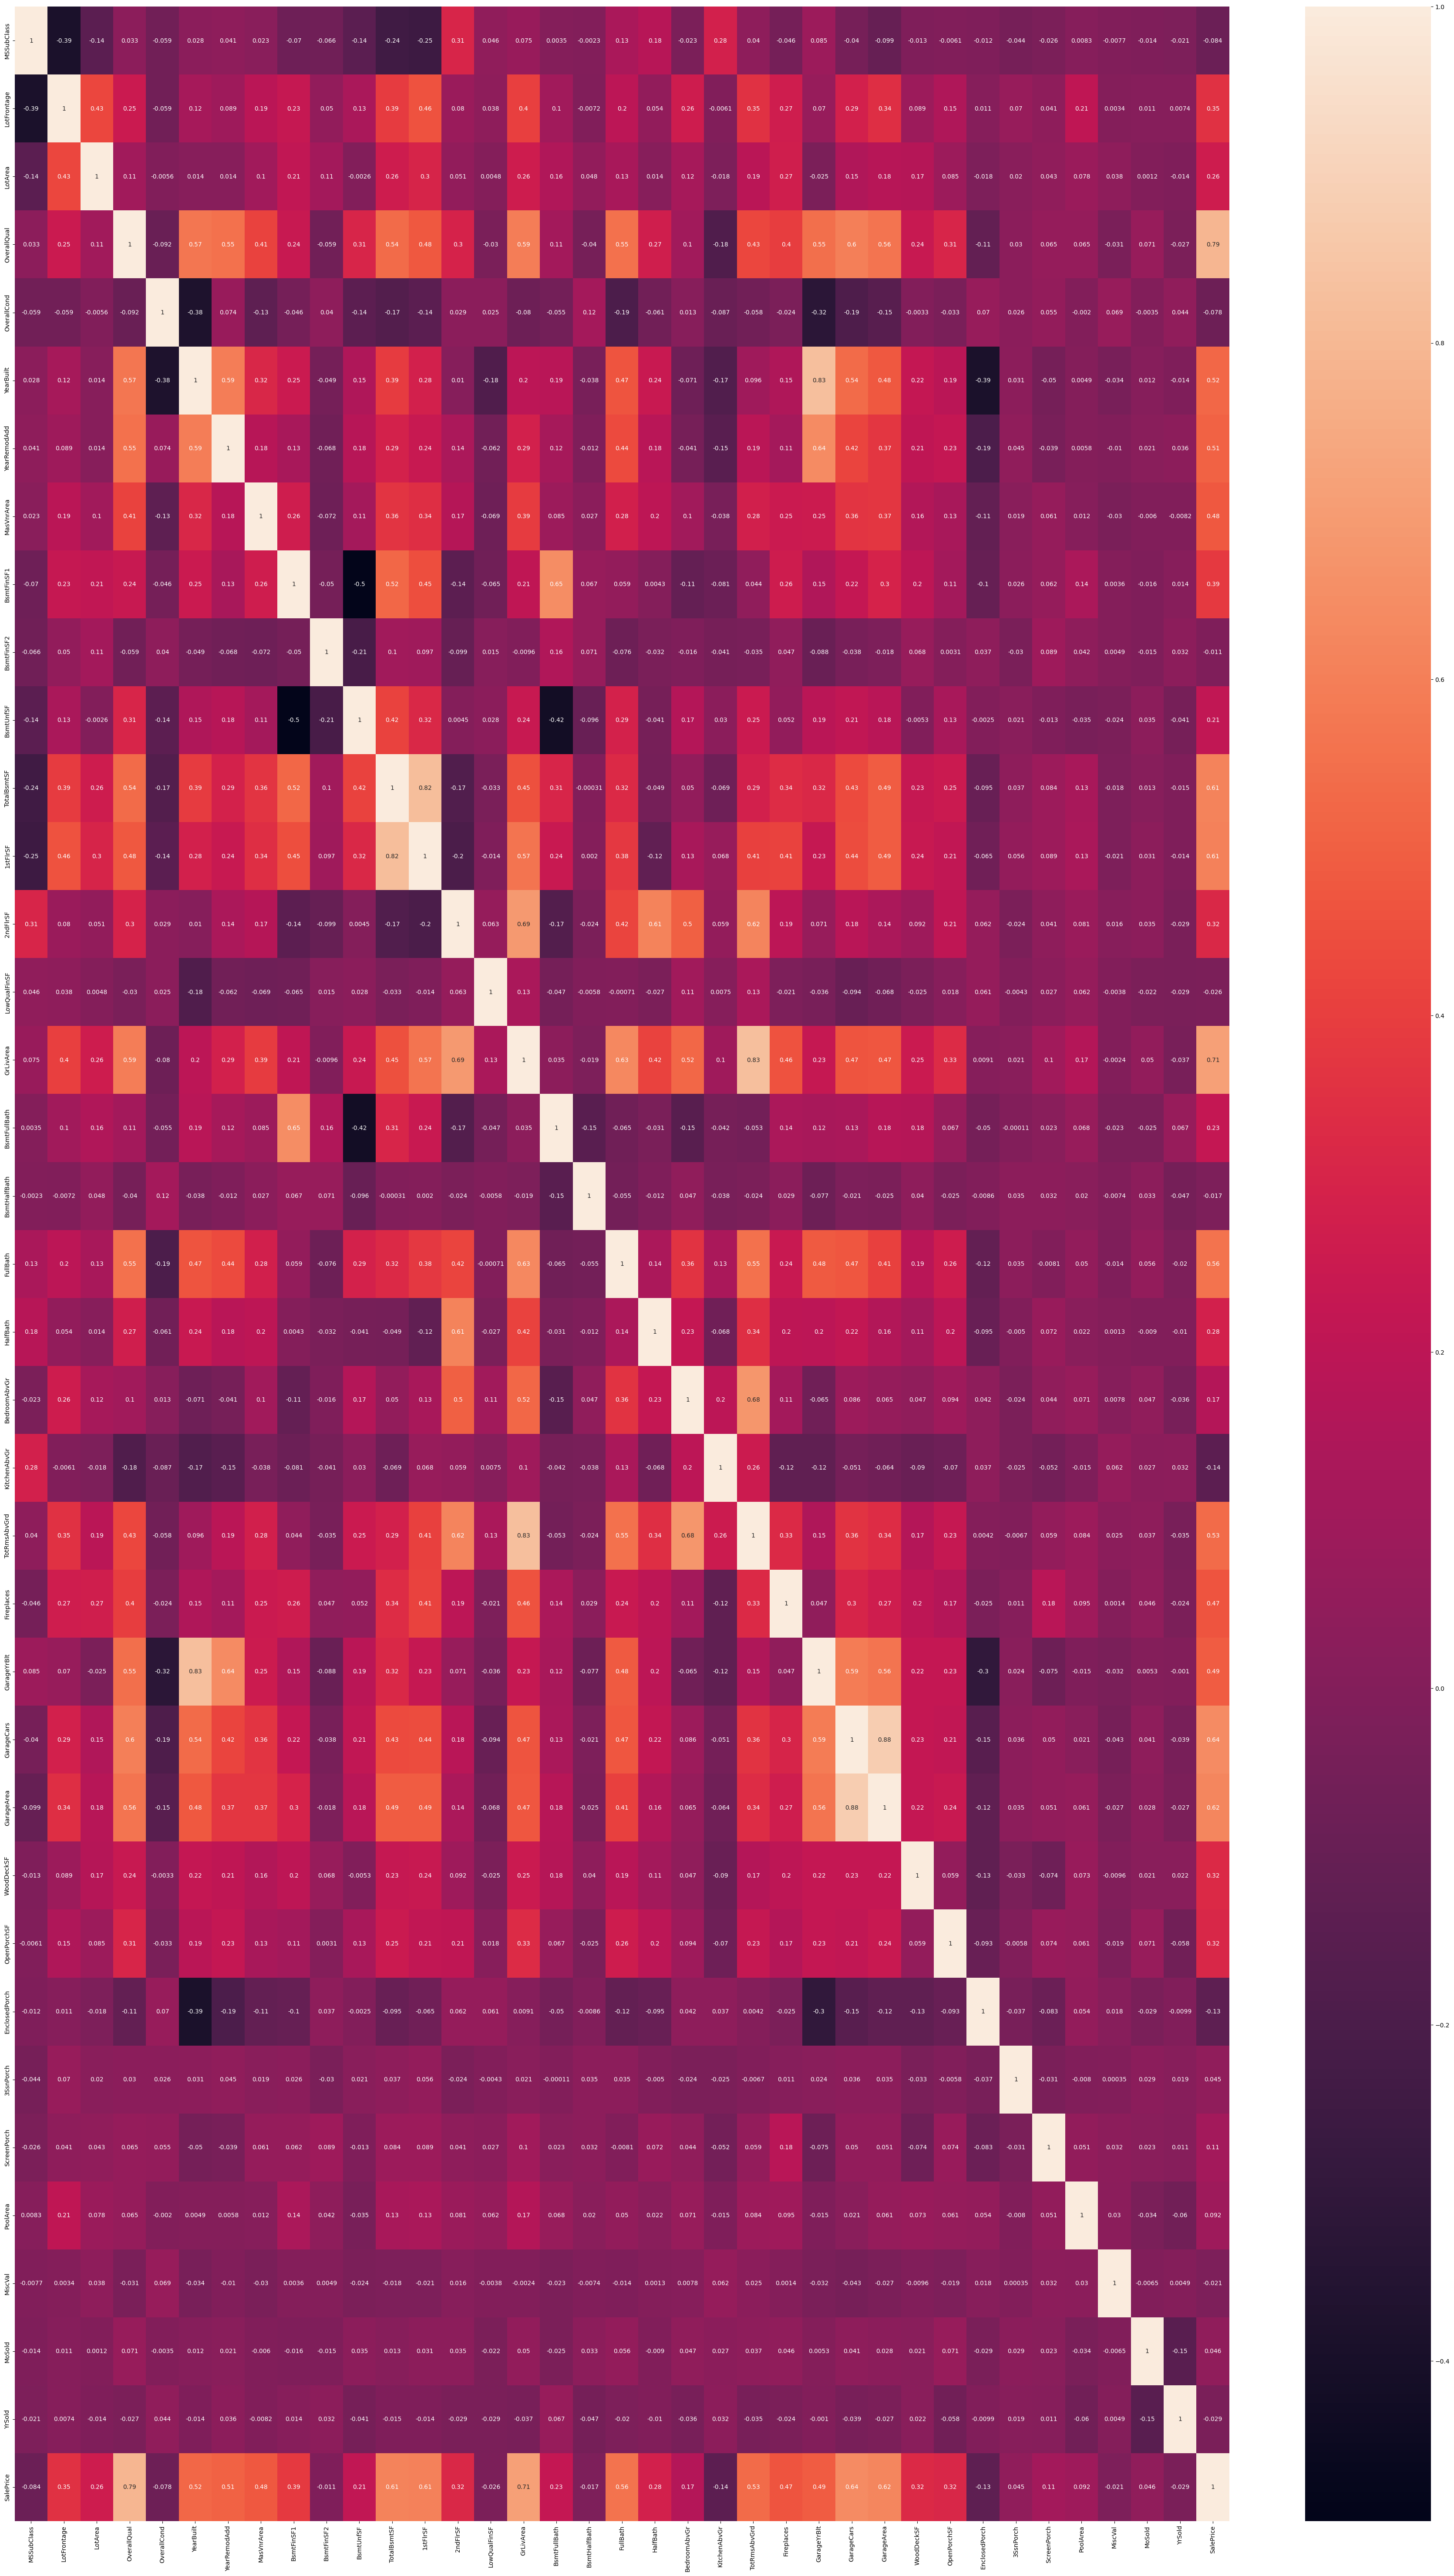

In [21]:
X_corr=data2.corr()
plt.figure(figsize=(45,75))
sns.heatmap(X_corr,annot=True)

**Preprocessing MissingVlaue**

In [22]:
def preprocess_missingvalue(X):
  X["LotFrontage"] = X.groupby("Neighborhood")["LotFrontage"].transform(lambda x:x.fillna(x.mean()))
  X["Electrical"] = X["Electrical"].fillna(X["Electrical"].mode()[0])
  for col in ['FireplaceQu','GarageType','GarageFinish','BsmtFinType2','PoolQC','Fence','MiscFeature','GarageQual','GarageCond','BsmtQual','BsmtCond','BsmtExposure',
                'BsmtFinType1','BsmtFinType2','MasVnrType','Alley']:
                X[col]=X[col].fillna("None")
  for col in ['GarageYrBlt','MasVnrArea']:
      X[col]=X[col].fillna(0)
  return X

**Feature Engineering**

In [23]:
def feature_engineering(X):
  X['SqFtPerRoom']=X['GrLivArea']/X['TotRmsAbvGrd']+(X['TotRmsAbvGrd']+
                                                    X['FullBath']+
                                                    X['HalfBath']+
                                                    X['KitchenAbvGr'])
  X['Total_Home_Quality']=X['OverallQual']+X['OverallCond']
  X['Total_Bathrooms']=(X['FullBath']+(0.5*X['HalfBath'])+
                        X['BsmtFullBath']+(0.5*X['BsmtHalfBath']))
  X['HighQualSF']=X['1stFlrSF']+X['2ndFlrSF']
  return X

**Removing Skewness**

In [24]:
def remove_skewness(X):
  x=X.copy()
  skew=0.5
  X_num=X.select_dtypes(exclude='object')
  skewness=X_num.apply(lambda x:x.skew())
  skewness_col=skewness[abs(skewness)>=skew].index
  X[skewness_col]=power_transform(X[skewness_col])
  X=pd.DataFrame(X,columns=x.columns)
  X = pd.get_dummies(X)
  return X

**Label Encoding**

In [25]:
def Encoding(X):
  le=LabelEncoder()
  colss =('MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition')

  for c in colss:
    X[c]=le.fit_transform(X[c])
  return X

**Removing Outliers**

In [26]:
def remove_outliers(X):

  for col in X.columns:
    X[col] = X[col].astype(float)
  for col in X.columns:
    percentile=X[col].quantile([0.01,0.98]).values
    X[col][X[col]<=percentile[0]]=percentile[0]
    X[col][X[col]>=percentile[1]]=percentile[1]

  return X

**Feature Scaling**

In [27]:
def Feature_Scaling(X):

  x=X.copy()
  scale=StandardScaler()
  X=scale.fit_transform(X)
  X=pd.DataFrame(X,columns=x.columns)

  return X

In [28]:
X = data.drop('SalePrice',axis=1)
y = data['SalePrice']

**Final Preprocessing**

In [29]:
def final_preprocessing(X):

  missing = preprocess_missingvalue(X)
  FE = feature_engineering(missing)
  encoding = Encoding(FE)
  skew = remove_skewness(encoding)
  scaling = Feature_Scaling(skew)

  return scaling

In [30]:
X=final_preprocessing(X)
X.head()

MSSubClass  MSZoning  LotFrontage   LotArea    Street     Alley  LotShape  \
0    0.493460 -0.185595    -0.186539 -0.141171  0.064238  0.024699  0.752862   
1   -1.164269 -0.185595     0.492421  0.105609  0.064238  0.024699  0.752862   
2    0.493460 -0.185595    -0.044640  0.413721  0.064238  0.024699 -1.371959   
3    0.698191 -0.185595    -0.430890  0.095490  0.064238  0.024699 -1.371959   
4    0.493460 -0.185595     0.661903  0.877127  0.064238  0.024699 -1.371959   

   LandContour  LotConfig  LandSlope  ...  MiscFeature   MiscVal    MoSold  \
0     0.337049   0.617130  -0.237571  ...    -0.131103 -0.192177 -1.599111   
1     0.337049  -1.050571  -0.237571  ...    -0.131103 -0.192177 -0.489110   
2     0.337049   0.617130  -0.237571  ...    -0.131103 -0.192177  0.990891   
3     0.337049  -1.738092  -0.237571  ...    -0.131103 -0.192177 -1.599111   
4     0.337049  -1.050571  -0.237571  ...    -0.131103 -0.192177  2.100892   

     YrSold  SaleType  SaleCondition  SqFtPerRoom  Total_Home_Quality  \
0  0.138777  0.388981       0.032281    -0.231053            0.192175   
1 -0.614439  0.388981       0.032281    -0.389385            1.373547   
2  0.138777  0.388981       0.032281     1.412405            0.192175   
3 -1.367655  0.388981      -2.599251     0.412937            0.192175   
4  0.138777  0.388981       0.032281     0.474249            0.782861   

   Total_Bathrooms  HighQualSF  
0         1.642256    0.536472  
1         0.368581   -0.374715  
2         1.642256    0.667609  
3        -0.268257    0.548784  
4         1.642256    1.296025  

[5 rows x 82 columns]

In [31]:
y

0       208500
1       181500
2       223500
3       140000
4       250000
         ...  
1455    175000
1456    210000
1457    266500
1458    142125
1459    147500
Name: SalePrice, Length: 1460, dtype: int64

**Log Transfrom**

<Axes: title={'center': 'Log normal transformation'}, xlabel='SalePrice', ylabel='Density'>

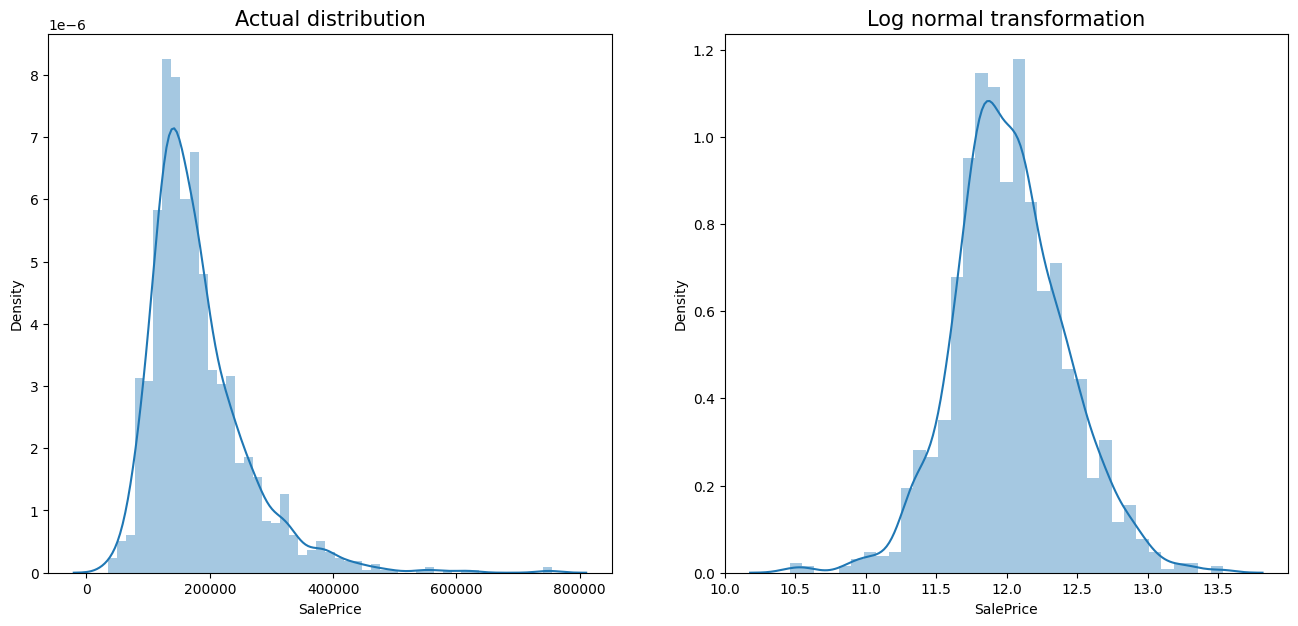

In [33]:
plt.figure(figsize=(16,7))
plt.subplot(1,2,1)
plt.title("Actual distribution",fontsize=15)
sns.distplot(y)
plt.subplot(1,2,2)
plt.title("Log normal transformation",fontsize=15)
sns.distplot(np.log(y))

**Spliting Data into test and train**

In [34]:
from sklearn.model_selection import train_test_split

In [35]:
X_train,X_test,y_train,y_test = train_test_split(X,np.log(y),test_size=0.2,random_state=42)

In [36]:
X_train.shape

(1168, 82)

In [37]:
X_test.shape

(292, 82)

**Algorithm models in Dictionary sets**

In [38]:
models={
    "LinearRegression":LinearRegression()
}

In [39]:
models.keys()

dict_keys(['LinearRegression'])

************************************************ LinearRegression *****************************************************
MEAN SQUARED ERROR 0.021183638068343443


MEAN ABSOLUTE ERROR 0.09880647839322214


CVS_SCORE 0.8725574679742708


R2_SCORE 0.8864839039141668


RMSE 0.14554599983628352


MODEL PERFORMANCE CURVE


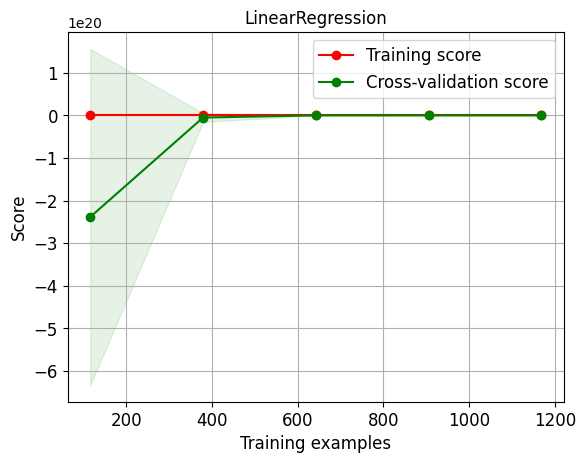

In [40]:
CVS = []
R2 = []
MSE = []
MAE = []
RMSE = []
NAME = []
kf  =  KFold(n_splits = 5,shuffle = True)
for name, model in models.items():
  print("************************************************",name,"*****************************************************")
  NAME.append(name)
  model.fit(X_train,y_train)
  y_pred = model.predict(X_test)
  mse = mean_squared_error(y_test,y_pred)
  MSE.append(mse)
  print("MEAN SQUARED ERROR",mse)
  mae = mean_absolute_error(y_test,y_pred)
  MAE.append(mae)
  print('\n')
  print("MEAN ABSOLUTE ERROR",mae)
  cvs = cross_val_score(model,X,np.log(y),scoring = 'r2',cv = kf).mean()
  CVS.append(cvs)
  print('\n')
  print("CVS_SCORE",cvs)
  r2 = r2_score(y_test,y_pred)
  R2.append(r2)
  print('\n')
  print("R2_SCORE",r2)
  rmse = np.sqrt(mse)
  RMSE.append(rmse)
  print('\n')
  print("RMSE",rmse)
  print('\n')
  print('MODEL PERFORMANCE CURVE')
  skplot.estimators.plot_learning_curve(model,X,np.log(y),cv = kf,scoring = 'r2',title = name,text_fontsize = 'large')
  plt.show()

In [41]:
models_result=pd.DataFrame({
    "NAME":NAME,
    "Cross_Val_Score":CVS,
    "R2_score":R2,
    "Mean_squared_error":MSE,
    "Mean_Absolute_Error":MAE,
    "RMSE":RMSE
})

In [42]:
models_result

NAME  Cross_Val_Score  R2_score  Mean_squared_error  \
0  LinearRegression         0.872557  0.886484            0.021184   

   Mean_Absolute_Error      RMSE  
0             0.098806  0.145546

In [48]:
test = pd.read_csv("/content/train-4.csv")

In [49]:
test

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0        1          60       RL         65.0     8450   Pave   NaN      Reg   
1        2          20       RL         80.0     9600   Pave   NaN      Reg   
2        3          60       RL         68.0    11250   Pave   NaN      IR1   
3        4          70       RL         60.0     9550   Pave   NaN      IR1   
4        5          60       RL         84.0    14260   Pave   NaN      IR1   
...    ...         ...      ...          ...      ...    ...   ...      ...   
1455  1456          60       RL         62.0     7917   Pave   NaN      Reg   
1456  1457          20       RL         85.0    13175   Pave   NaN      Reg   
1457  1458          70       RL         66.0     9042   Pave   NaN      Reg   
1458  1459          20       RL         68.0     9717   Pave   NaN      Reg   
1459  1460          20       RL         75.0     9937   Pave   NaN      Reg   

     LandContour Utilities  ... PoolArea PoolQC  Fence MiscFeature MiscVal  \
0            Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
1            Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
2            Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
3            Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
4            Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
...          ...       ...  ...      ...    ...    ...         ...     ...   
1455         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
1456         Lvl    AllPub  ...        0    NaN  MnPrv         NaN       0   
1457         Lvl    AllPub  ...        0    NaN  GdPrv        Shed    2500   
1458         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
1459         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   

     MoSold YrSold  SaleType  SaleCondition  SalePrice  
0         2   2008        WD         Normal     208500  
1         5   2007        WD         Normal     181500  
2         9   2008        WD         Normal     223500  
3         2   2006        WD        Abnorml     140000  
4        12   2008        WD         Normal     250000  
...     ...    ...       ...            ...        ...  
1455      8   2007        WD         Normal     175000  
1456      2   2010        WD         Normal     210000  
1457      5   2010        WD         Normal     266500  
1458      4   2010        WD         Normal     142125  
1459      6   2008        WD         Normal     147500  

[1460 rows x 81 columns]

In [50]:
test = final_preprocessing(test)

In [51]:
test

Id  MSSubClass  MSZoning  LotFrontage   LotArea    Street  \
0    -1.730865    0.493460 -0.185595    -0.186539 -0.141171  0.064238   
1    -1.728492   -1.164269 -0.185595     0.492421  0.105609  0.064238   
2    -1.726120    0.493460 -0.185595    -0.044640  0.413721  0.064238   
3    -1.723747    0.698191 -0.185595    -0.430890  0.095490  0.064238   
4    -1.721374    0.493460 -0.185595     0.661903  0.877127  0.064238   
...        ...         ...       ...          ...       ...       ...   
1455  1.721374    0.493460 -0.185595    -0.331915 -0.266808  0.064238   
1456  1.723747   -1.164269 -0.185595     0.703606  0.722071  0.064238   
1457  1.726120    0.698191 -0.185595    -0.138865 -0.010330  0.064238   
1458  1.728492   -1.164269 -0.185595    -0.044640  0.129088  0.064238   
1459  1.730865   -1.164269 -0.185595     0.274175  0.172505  0.064238   

         Alley  LotShape  LandContour  LotConfig  ...    YrSold  SaleType  \
0     0.024699  0.752862     0.337049   0.617130  ...  0.138777  0.388981   
1     0.024699  0.752862     0.337049  -1.050571  ... -0.614439  0.388981   
2     0.024699 -1.371959     0.337049   0.617130  ...  0.138777  0.388981   
3     0.024699 -1.371959     0.337049  -1.738092  ... -1.367655  0.388981   
4     0.024699 -1.371959     0.337049  -1.050571  ...  0.138777  0.388981   
...        ...       ...          ...        ...  ...       ...       ...   
1455  0.024699  0.752862     0.337049   0.617130  ... -0.614439  0.388981   
1456  0.024699  0.752862     0.337049   0.617130  ...  1.645210  0.388981   
1457  0.024699  0.752862     0.337049   0.617130  ...  1.645210  0.388981   
1458  0.024699  0.752862     0.337049   0.617130  ...  1.645210  0.388981   
1459  0.024699  0.752862     0.337049   0.617130  ...  0.138777  0.388981   

      SaleCondition  SalePrice  SqFtPerRoom  Total_Home_Quality  \
0          0.032281   0.571155    -0.231053            0.192175   
1          0.032281   0.227627    -0.389385            1.373547   
2          0.032281   0.741869     1.412405            0.192175   
3         -2.599251  -0.425386     0.412937            0.192175   
4          0.032281   1.015293     0.474249            0.782861   
...             ...        ...          ...                 ...   
1455       0.032281   0.136679     0.241497           -0.398511   
1456       0.032281   0.588812     1.386847            0.192175   
1457       0.032281   1.170202     0.770533            2.554919   
1458       0.032281  -0.387136    -0.308095           -0.398511   
1459       0.032281  -0.293072    -0.414561           -0.398511   

      Total_Bathrooms  HighQualSF  Utilities_AllPub  Utilities_NoSeWa  
0            1.642256    0.536472           0.02618          -0.02618  
1            0.368581   -0.374715           0.02618          -0.02618  
2            1.642256    0.667609           0.02618          -0.02618  
3           -0.268257    0.548784           0.02618          -0.02618  
4            1.642256    1.296025           0.02618          -0.02618  
...               ...         ...               ...               ...  
1455         0.368581    0.423414           0.02618          -0.02618  
1456         1.005418    1.118350           0.02618          -0.02618  
1457        -0.268257    1.486354           0.02618          -0.02618  
1458        -0.268257   -0.843970           0.02618          -0.02618  
1459         0.368581   -0.388940           0.02618          -0.02618  

[1460 rows x 86 columns]